# Credit Risk Analysis
## by Tom Esch

## Investigation Overview

> In this investigation, I wanted to see what factors contribute to a loan not being repaid. Which borrowers have the most risk?

## Dataset Overview

> The dataset consists of 113937 observations of loan data from Prosper, a private lending company. This includes 81 variables. We look at a subset of these variables for our analysis.

In [1]:
# import all packages and set plots to be embedded inline
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

%matplotlib inline

# suppress warnings from final output
import warnings
warnings.simplefilter("ignore")

In [2]:
# load in the dataset into a pandas dataframe
df = pd.read_csv('prosperLoanData.csv')
# create a new dataframe with loan statuses that have not been repaid
df_default = df.query("LoanStatus == 'Defaulted' or LoanStatus == 'Chargedoff'")
df_clean = df_default[['LoanStatus', 'BorrowerAPR', 'ProsperScore', 'IsBorrowerHomeowner', 'IncomeRange', 'StatedMonthlyIncome', 'IncomeVerifiable', 'LoanOriginalAmount', 'DebtToIncomeRatio', 'CurrentDelinquencies', 'Occupation']].copy()
df_clean.dropna(inplace=True)

## Borrower Occupation vs Loan Status

> Those listed as "other" and "professional" occupations are more likely to  not repay their loan.

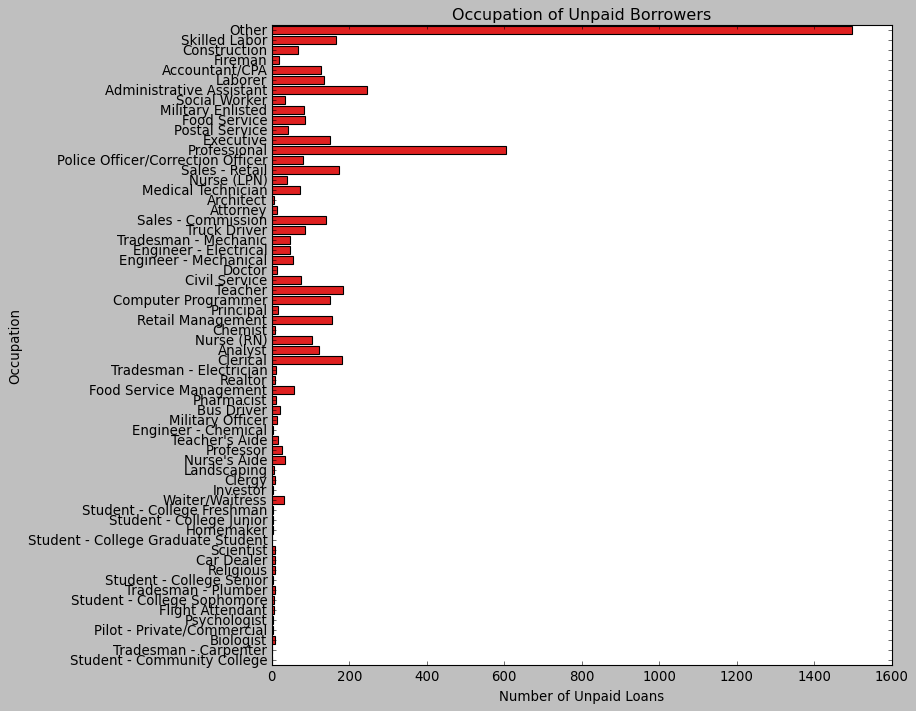

In [3]:
#hide_code_in_slideshow()
plt.style.use('classic')
color = sns.color_palette()[2]
plt.figure(figsize=(10,10))
chart1 = sns.countplot(data=df_clean, y='Occupation', color=color);
plt.title('Occupation of Unpaid Borrowers');
plt.xlabel('Number of Unpaid Loans');


## Borrower Income vs Loan Status

> Borrowers in the $25,000 - $50,000 income range are most likely to default, and only complete the second highest amount of loans!

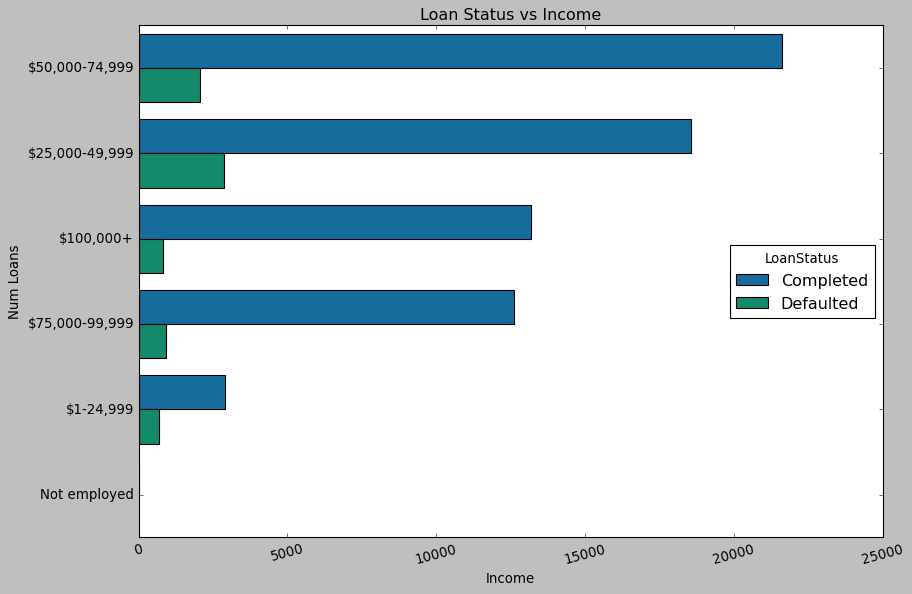

In [4]:
#hide_code_in_slideshow()
df_b = df[['LoanStatus', 'EmploymentStatus', 'BorrowerAPR', 'ProsperScore', 'IsBorrowerHomeowner', 'IncomeRange', 'StatedMonthlyIncome', 'IncomeVerifiable', 'LoanOriginalAmount', 'DebtToIncomeRatio', 'CurrentDelinquencies', 'TotalCreditLinespast7years', 'Occupation']].copy()
df_b.dropna(inplace=True)
df_b['LoanStatus'] = np.where((df_b['LoanStatus'] == 'Current') | (df_b['LoanStatus'] == 'Completed')| 
                         (df_b['LoanStatus'] == 'Cancelled'), 
                         'Completed', 'Defaulted')
order = df_b['Occupation'].value_counts().index
plt.style.use('seaborn-colorblind')
plt.figure(figsize=(12,8))
sns.countplot(data = df_b, y='IncomeRange', hue='LoanStatus');
plt.xlabel('Income')
plt.ylabel('Num Loans')
plt.title('Loan Status vs Income');
plt.xticks(rotation = 15);


## Borrower APR and Employment Status vs Loan Status
Borrower's with a higher APR are more likely to default.


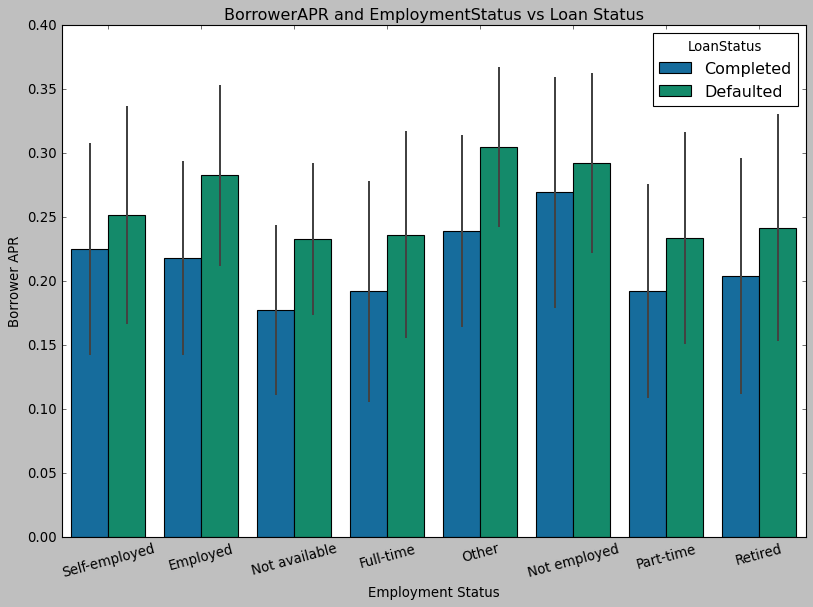

In [5]:
#hide_code_in_slideshow()
df_m = df[['LoanStatus', 'EmploymentStatus', 'BorrowerAPR', 'ProsperScore', 'IncomeRange', 'StatedMonthlyIncome', 'IncomeVerifiable', 'LoanOriginalAmount', 'DebtToIncomeRatio', 'CurrentDelinquencies']].copy()
# create column with relevant loan statuses
df_m['LoanStatus'] = np.where((df_m['LoanStatus'] == 'Current') | 
                         (df_m['LoanStatus'] == 'Completed')| 
                         (df_m['LoanStatus'] == 'Cancelled'), 
                         'Completed', 'Defaulted')
plt.figure(figsize=(12,8))
sns.barplot(data=df_m, y = 'BorrowerAPR', 
            x='EmploymentStatus', hue="LoanStatus", ci='sd');

plt.xlabel('Employment Status');
plt.ylabel('Borrower APR');
plt.title('BorrowerAPR and EmploymentStatus vs Loan Status');
plt.xticks(rotation=15);